### Easy

In [149]:
from pathlib import Path
import zipfile
import os


def extract(zip_folder, language):
    extensions = {
        'Java': ['.java'],
        'Python': ['.py'],
        'C++': ['.cpp', '.h', '.hpp', '.c'],
        'JavaScript': ['.js']
    }

    file_extensions = extensions.get(language, [])
    if not file_extensions:
        return []

    data_lst = []
    zip_folder_path = Path(zip_folder)

    for zip_path in zip_folder_path.glob('*.zip'):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            files = [f for f in zip_ref.namelist() if any(f.lower().endswith(ext.lower()) for ext in file_extensions)]
            for file_name in files:
                file_path = zip_folder_path / file_name
                file_path.parent.mkdir(parents=True, exist_ok=True)
                try:
                    zip_ref.extract(file_name, zip_folder_path)
                    with open(file_path, 'r', encoding='utf-8') as file:
                        code_content = file.read()
                    data_lst.append({'language': language, 'code': code_content})
                except UnicodeDecodeError:
                    pass
                except Exception as e:
                    pass
                finally:
                    if file_path.exists():
                        os.remove(file_path)

    df = pd.DataFrame(data_lst, columns=['language', 'code'])
    return df

In [150]:
python = extract('../scripts/python', 'Python')
print(len(python))

6634


In [151]:
js = extract('../scripts/js', 'JavaScript')
print(len(js))

4389


In [152]:
cpp = extract('../scripts/cpp', 'C++')
print(len(cpp))

6820


In [153]:
java = extract('../scripts/java', 'Java')
print(len(java))

6215


In [154]:
import pandas as pd

other_src = pd.read_csv('../scripts/eng/english.csv')
other = other_src[['text']].copy()
other.rename(columns={'text': 'code'}, inplace=True)
other['language'] = 'Other'
print(len(other))

10000


In [155]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

data = pd.concat([python, cpp, js, java, other], ignore_index=True)

data.dropna(inplace=True)

print(f'Size: {len(data)}')

x = data['code']
y = data['language']

Size: 34058


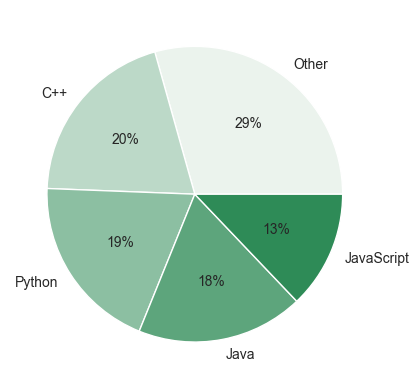

In [156]:
language_counts = data['language'].value_counts()
languages = language_counts.index.tolist()
number_of_reviews = language_counts.tolist()

colors = sns.light_palette('seagreen', len(languages))

plt.pie(number_of_reviews, labels=languages, colors=colors, autopct='%.0f%%')
plt.show()

In [88]:
def save_files(language, n, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    filtered_data = data[data['language'] == language]

    sampled_data = filtered_data.sample(n=min(n, len(filtered_data)),
                                        random_state=1)

    # Save each file
    for i, row in enumerate(sampled_data.itertuples(), start=1):
        file_path = os.path.join(output_dir, f"{language}_sample_{i}.txt")
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(row.code)


save_files('JavaScript', 2, 'files')

C:\Users\dv\PycharmProjects\ml_practise\notebooks


In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x_vectorized = vectorizer.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_vectorized, y, test_size=0.2, random_state=42)

In [82]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.15, depth=2, verbose=False, task_type='GPU')
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

0:	learn: 1.1666190	total: 787ms	remaining: 13m 6s
1:	learn: 1.0406177	total: 863ms	remaining: 7m 10s
2:	learn: 0.9279995	total: 945ms	remaining: 5m 13s
3:	learn: 0.8505527	total: 1.02s	remaining: 4m 14s
4:	learn: 0.7694018	total: 1.1s	remaining: 3m 40s
5:	learn: 0.7082456	total: 1.17s	remaining: 3m 14s
6:	learn: 0.6640354	total: 1.24s	remaining: 2m 55s
7:	learn: 0.6198139	total: 1.31s	remaining: 2m 42s
8:	learn: 0.5831912	total: 1.39s	remaining: 2m 32s
9:	learn: 0.5466487	total: 1.46s	remaining: 2m 24s
10:	learn: 0.5210431	total: 1.54s	remaining: 2m 18s
11:	learn: 0.4969218	total: 1.61s	remaining: 2m 12s
12:	learn: 0.4706623	total: 1.69s	remaining: 2m 8s
13:	learn: 0.4513329	total: 1.75s	remaining: 2m 3s
14:	learn: 0.4336989	total: 1.82s	remaining: 1m 59s
15:	learn: 0.4150330	total: 1.89s	remaining: 1m 56s
16:	learn: 0.3943517	total: 1.98s	remaining: 1m 54s
17:	learn: 0.3812160	total: 2.05s	remaining: 1m 51s
18:	learn: 0.3670194	total: 2.12s	remaining: 1m 49s
19:	learn: 0.3560729	tota

In [158]:
model = LogisticRegression(verbose=True)
model.fit(x_train, y_train)

LogisticRegression(verbose=True)

In [159]:
my_x_test = [("model = LogisticRegression(verbose=True)"
              "model.fit(x_train, y_train)"
              "predictions = model.predict(x_test)"
              "accuracy = accuracy_score(y_test, predictions)"
              "print(f'Accuracy: {accuracy * 100:.2f}%')"),
             ("void *operator new(size_t n) {"
              "    if (!mem) {"
              "        mem = static_cast<int8_t *>(malloc(MAX_MEM));"
              "    }"
              "    size_t pos = alignUp(m_pos, alignof(std::max_align_t));"
              ""
              "    if (pos + n > MAX_MEM) {"
              "        throw std::bad_alloc();"
              "    }"
              ""
              "    m_pos = pos + n;"
              "    return mem + pos;"
              "}"),
             (
                 "Karim Khan did not provide specific details of attempts to interfere in the ICC’s work, but he noted a clause in the court’s foundational treaty that made any such interference a criminal offence. If the conduct continued, he added, “my office will not hesitate to act”."

                 "The prosecutor did not say who had attempted to intervene in the administration of justice, or how exactly they had done so."

                 "Now, an investigation by the Guardian and the Israeli-based magazines +972 and Local Call can reveal how Israel has run an almost decade-long secret “war” against the court. The country deployed its intelligence agencies to surveil, hack, pressure, smear and allegedly threaten senior ICC staff in an effort to derail the court’s inquiries."),
             ("package com.core.example.arrays;"

              "import java.util.ArrayList;"
              "import java.util.List;"

              "public class ArrayListToArrayConversion {"

              "	public static void main(String[] args) {"
              "		List<Integer> al = new ArrayList<Integer>();"
              "		al.add(10);"
              "		al.add(20);"
              "		al.add(30);"
              "		al.add(40);"
              "		al.add(50);"

              "		Integer[] arr = new Integer[al.size()];"
              "		arr = al.toArray(arr);"
              "		for(Integer x: arr) {"
              "		System.out.print(x + " ");"
              "		}"
              "	}"
              "}")]

my_x_processed = vectorizer.transform(my_x_test)

predictions = model.predict(my_x_processed)
predictions

array(['Python', 'C++', 'Other', 'Java'], dtype=object)

### Medium

### Hard